# Battle of Neighborhood - Week 1

## Introduction: Best place to open a Restaurant with Indian cuisine (restricted menu)...

Recently a friend of mine approached me for my advice on opening a restricted menu restaurant in Delhi (India) considering financialy turbulent times in covid era. And here comes the Capstone project where I am supposed to do ceratin analysis on neighborhood's. So am making certain assumptions to make it fit for this project.

## Business Problem
* My friend wants to go global.
* Initial Choice was between Newyork and Toronto, However after analysing census data, advice was to open it in Toronto which is having sizable population of South Asians. As this is the group which will become  patrons in initial phase.
* Still idea of restaurant is with restricted menu (we are on same frequency on this part).
* Both cities are very diverse and financial capital of their respective country.

### Target Audience
* This is for my friend who wants to go global with his restaurant.
* May be useful for someone else thinking on similar lines.

### Considerations
* South Asian population
* Market
* Nearby places contibuting potential clients
* other reataurant's in area and possible competition as well as potential clients.

### Mehodology
* Data driven.
* leveraging python capabilities with folium, foursquare and matplotlib for visualization and sklearn for analysis.
* from census data, south asian population will be derived in each neighborhood.
* Four Square / Google API to be used for getting coordinates of neighborhood and venues.
* Using appropriate clustering methods, will try to find cluster where we can setup our Restaurant.

### Data
* Demographic data of Toronto.
* Neighborhood data for Toronto.
* Venue data for Toronto.
* Venues specific to Indian cuisine...

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
import sklearn
from sklearn.cluster import KMeans
import folium # map rendering library

print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Requests version: {requests.__version__}")
print(f"sklearn version: {sklearn.__version__}")
print(f"folium version: {folium.__version__}")

Matplotlib version: 3.4.2
Numpy version: 1.21.0
Pandas version: 1.2.5
Requests version: 2.15.1
sklearn version: 0.24.2
folium version: 0.12.1


## Data

### Demographic data of Toronto

Neighborhood profile data for city of [Toronto](https://open.toronto.ca/dataset/neighbourhood-profiles/).
data has the population in 2016 as well as of 2011, however we will be using for the year 2016.

To get the idea of South Asian population, have decided to use 'Mother tongue' to determine their roots (you know food habits are hard to change...).

Indo-aryan languages and punjabi serves the purpose to find south asian population...

In [2]:
np_data = "./data/neighbourhood-profiles-2016.csv"
np_toronto = pd.read_csv(np_data)
np_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Columns: 146 entries, _id to Yorkdale-Glen Park
dtypes: int64(1), object(145)
memory usage: 2.7+ MB


In [3]:
np_toronto.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


#### Feature Selection

* Population for 2016.
* Mother tongue: Indo- aryan languages and Punjabi

to get an idea of south asian population.

In [3]:
np_toronto['Characteristic'] = np_toronto.Characteristic.str.strip()
characteristics = ['Population, 2016', 'Indo-Aryan languages', 'Punjabi (Panjabi)']

cond1 = np_toronto['Characteristic'].isin(characteristics)
cond2 = np_toronto['Topic'].isin(["Mother tongue", "Population and dwellings"])  
toronto_character = np_toronto[cond1 & cond2]
toronto_ind_diaspora = toronto_character.T.iloc[4:, :]
toronto_ind_diaspora


,2,303,312
Characteristic,"Population, 2016",Indo-Aryan languages,Punjabi (Panjabi)
City of Toronto,"2,731,571","138,625","19,965"
Agincourt North,"29,113",910,105
Agincourt South-Malvern West,"23,757","1,500",165
Alderwood,"12,054",205,15
...,...,...,...
Wychwood,"14,349",80,25
Yonge-Eglinton,"11,817",115,10
Yonge-St.Clair,"12,528",130,20
York University Heights,"27,593","1,710",265


Seems dtype is 'object' so converting it into 'float' to get percentage south asian population in each neighborhood

In [4]:
cols = [ 'pop2016', 'indo_aryan', 'punjabi']
toronto_ind_diaspora.columns = cols
# toronto_ind = toronto_ind_diaspora.iloc[1:, :]
toronto_ind = pd.DataFrame(index=toronto_ind_diaspora.index[2:])
indo_aryan = toronto_ind_diaspora.loc[:, 'indo_aryan'].str.replace(',', '')
toronto_ind['indo_aryan'] = indo_aryan
pop2016 = toronto_ind_diaspora.loc[:, 'pop2016'].str.replace(',', '')
toronto_ind['pop2016'] = pop2016
punjabi = toronto_ind_diaspora.loc[:, 'punjabi'].str.replace(',', '')
toronto_ind['punjabi'] = punjabi
toronto_ind.head()

,indo_aryan,pop2016,punjabi
Agincourt North,910,29113,105
Agincourt South-Malvern West,1500,23757,165
Alderwood,205,12054,15
Annex,400,30526,50
Banbury-Don Mills,1065,27695,40


In [5]:
toronto_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Agincourt North to Yorkdale-Glen Park
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   indo_aryan  140 non-null    object
 1   pop2016     140 non-null    object
 2   punjabi     140 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [6]:
toronto_ind['indo_aryan'] = toronto_ind['indo_aryan'].astype('float64')
toronto_ind['pop2016'] = toronto_ind['pop2016'].astype('float64')
toronto_ind['punjabi'] = toronto_ind['punjabi'].astype('float64')

In [7]:
toronto_ind['%pop'] = (
    (toronto_ind['indo_aryan'] + toronto_ind['punjabi']) / toronto_ind['pop2016']) * 100
toronto_ind.head()

,indo_aryan,pop2016,punjabi,%pop
Agincourt North,910.0,29113.0,105.0,3.486415
Agincourt South-Malvern West,1500.0,23757.0,165.0,7.008461
Alderwood,205.0,12054.0,15.0,1.825120
Annex,400.0,30526.0,50.0,1.474153
Banbury-Don Mills,1065.0,27695.0,40.0,3.989890


Sorting percentage population in descending order

In [8]:
# plot top 10 neighborhood with indian diaspora
ind_in_toronto = toronto_ind.sort_values('%pop', ascending=False)
ind_in_toronto

,indo_aryan,pop2016,punjabi,%pop
West Humber-Clairville,8710.0,33312.0,4925.0,40.931196
Thorncliffe Park,7140.0,21108.0,435.0,35.886868
Humber Summit,2615.0,12416.0,975.0,28.914304
Mount Olive-Silverstone-Jamestown,6870.0,32954.0,2635.0,28.843236
Taylor-Massey,4065.0,15683.0,100.0,26.557419
...,...,...,...,...
Briar Hill-Belgravia,70.0,14257.0,15.0,0.596198
The Beaches,90.0,21567.0,20.0,0.510038
Bedford Park-Nortown,100.0,23236.0,10.0,0.473403
Runnymede-Bloor West Village,40.0,10070.0,5.0,0.446872


In [9]:
ind_in_toronto.to_csv("./data/toronto_neighborhoods.csv", index=True)

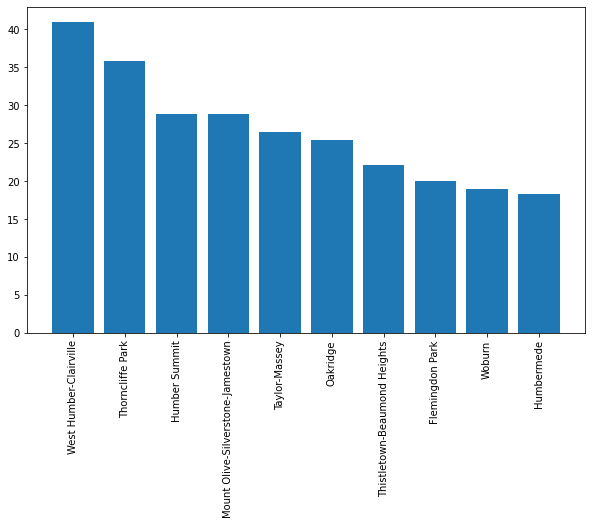

In [9]:
# visualize
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(ind_in_toronto.index[:10], ind_in_toronto['%pop'][:10])
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

#### Observation:

* west Humber - Clairville & Thorncliffe Park neighborhood has around 35% south asian population.
* Humber summit, Mount Olive, Silverstone, Jamestown, Taylor-Massey, Oakridge has around 25% south asian population.

we will see in venue data how many indian restaurants are there in these neighborhoods.

In [24]:
# There are 140 neighborhoods in Toronto, ON, Canada
neighborhoods = ind_in_toronto.index.tolist()
neighborhoods[:10]

['West Humber-Clairville',
 'Thorncliffe Park',
 'Humber Summit',
 'Mount Olive-Silverstone-Jamestown',
 'Taylor-Massey',
 'Oakridge',
 'Thistletown-Beaumond Heights',
 'Flemingdon Park',
 'Woburn',
 'Humbermede']

### Coordinates of Toronto Neighborhood

Note: have used google api to get the geocode for these neighborhood and saved as csv file to not to incur cost while running this notebook every time

In [10]:
from geopy.geocoders import Nominatim

In [11]:
# loading coordinates data file for neighborhoods

df_coords = pd.read_csv("./data/toronto_neighborhoods.csv")
df_coords.head()

,S_No,Neighborhood,lat,lon,pop2016,indo_aryan,punjabi,%pop
0,1,West Humber-Clairville,43.755174,-79.627079,33312,8710,4925,40.93
1,2,Thorncliffe Park,43.708683,-79.349370,21108,7140,435,35.89
2,3,Humber Summit,43.757886,-79.559063,12416,2615,975,28.91
3,4,Mount Olive-Silverstone-Jamestown,43.742375,-79.588163,32954,6870,2635,28.84
4,5,Taylor-Massey,43.745433,-79.284514,15683,4065,100,26.56


## Map of Toronto with its neighborhood

In [12]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_exp")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [13]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_coords['lat'],
                                           df_coords['lon'],
                                           df_coords['Neighborhood']):
    label = f'{neighborhood}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Top 10 neighborhood with sizable South Asian population

In [16]:
df_10 = df_coords.iloc[:10, :]
df_10

,S_No,Neighborhood,lat,lon,pop2016,indo_aryan,punjabi,%pop
0,1,West Humber-Clairville,43.755174,-79.627079,33312,8710,4925,40.93
1,2,Thorncliffe Park,43.708683,-79.349370,21108,7140,435,35.89
2,3,Humber Summit,43.757886,-79.559063,12416,2615,975,28.91
3,4,Mount Olive-Silverstone-Jamestown,43.742375,-79.588163,32954,6870,2635,28.84
4,5,Taylor-Massey,43.745433,-79.284514,15683,4065,100,26.56
5,6,Oakridge,43.698738,-79.274791,13845,3465,60,25.46
6,7,Thistletown-Beaumond Heights,43.743105,-79.571224,10360,1640,660,22.20
7,8,Flemingdon Park,43.719912,-79.331330,21933,4245,140,19.99
8,9,Woburn,43.781110,-79.232026,53485,9700,440,18.96
9,10,Humbermede,43.740891,-79.539239,15545,2130,715,18.30


In [17]:
map_toronto_10 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_10['lat'], df_10['lon'], df_10['Neighborhood']):
    label = f'{neighborhood}'
    folium.Marker(
        [lat, lng],
        popup=label,
        icon=folium.Icon(color='blue')).add_to(map_toronto_10)  
    
map_toronto_10

### Using Four Square API to explore neighborhood

taking top 10 neighborhood with sizable population of south asians for further exploration of venues associated with these places...

In [18]:
from configparser import ConfigParser

config = ConfigParser()
config.read("./keys.ini")

client_id = config.get("foursquare", 'ApiKey')
client_secret = config.get("foursquare", 'ApiSecret')
version = '20210704'
limit = 100 # A default Foursquare API limit value

In [19]:
# testing for West Humber-Clairville, lat:43.755174, lon:-79.627079
url = 'https://api.foursquare.com/v2/venues/explore'
params = dict(
    client_id = client_id,
    client_secret = client_secret,
    v = version,
    ll = "43.755174, -79.627079",
    query="restaurant",
    radius=2000,
    limit=100
)
results = requests.get(url=url, params=params)
results

<Response [200]>

In [20]:
results.json()

{'meta': {'code': 200, 'requestId': '60e13b4f988cba687c50ac8a'},
 'response': {'headerLocation': 'Vaughan',
  'headerFullLocation': 'Vaughan',
  'headerLocationGranularity': 'city',
  'query': 'restaurant',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.77317401800001,
    'lng': -79.60220516327264},
   'sw': {'lat': 43.73717398199998, 'lng': -79.65195283672735}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c8baba11797236a141c6d88',
       'name': 'Samosa & Sweet Factory',
       'location': {'address': '1850 Albion Road',
        'lat': 43.74659,
        'lng': -79.615189,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.74659,
          'lng': -79.615189}],
        'distance': 1351,
        'cc': 'CA',
        'city': 'Toronto',
   

### Before we proceed, let's borrow the **getNearbyVenues** function from the Foursquare lab to get the venue and category

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    counter = 0
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        counter += 1
        if counter % 5 != 0:
            print(name, end=" ")
        else:
            print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore'
        params = dict(
            client_id = client_id,
            client_secret = client_secret,
            v = version,
            ll = f"{lat}, {lng}",
            query='restaurant',
            radius=radius,
            limit=limit
        )
            
        # make the GET request
        results = requests.get(url=url, params=params).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighborhood', 
                             'neighborhood_lat',  
                             'neighborhood_lon',
                             'venue', 
                             'venue_lat', 
                             'venue_lon', 
                             'venue_cat']
    
    return(nearby_venues)

In [23]:
toronto_nghd = getNearbyVenues(
    names=df_10['Neighborhood'],
    latitudes=df_10['lat'],
    longitudes=df_10['lon'])

West Humber-Clairville Thorncliffe Park Humber Summit Mount Olive-Silverstone-Jamestown Taylor-Massey
Oakridge Thistletown-Beaumond Heights Flemingdon Park Woburn Humbermede


In [24]:
toronto_nghd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   neighborhood      371 non-null    object 
 1   neighborhood_lat  371 non-null    float64
 2   neighborhood_lon  371 non-null    float64
 3   venue             371 non-null    object 
 4   venue_lat         371 non-null    float64
 5   venue_lon         371 non-null    float64
 6   venue_cat         371 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.4+ KB


In [25]:
toronto_nghd.head(2)

,neighborhood,neighborhood_lat,neighborhood_lon,venue,venue_lat,venue_lon,venue_cat
0,West Humber-Clairville,43.755174,-79.627079,Samosa & Sweet Factory,43.746590,-79.615189,Indian Restaurant
1,West Humber-Clairville,43.755174,-79.627079,Exotic indian cuisine,43.745956,-79.615838,Indian Restaurant


In [26]:
toronto_nghd.groupby('neighborhood').count()

,neighborhood_lat,neighborhood_lon,venue,venue_lat,venue_lon,venue_cat
neighborhood,,,,,,
Flemingdon Park,52,52,52,52,52,52
Humber Summit,26,26,26,26,26,26
Humbermede,19,19,19,19,19,19
Mount Olive-Silverstone-Jamestown,32,32,32,32,32,32
Oakridge,31,31,31,31,31,31
Taylor-Massey,69,69,69,69,69,69
Thistletown-Beaumond Heights,27,27,27,27,27,27
Thorncliffe Park,51,51,51,51,51,51
West Humber-Clairville,5,5,5,5,5,5


In [27]:
# Unique venue categories
print(f"There are {len(toronto_nghd['venue_cat'].unique())} uniques categories.")

There are 49 uniques categories.


### Analyze each neighborhood

In [28]:
toronto_oh = pd.get_dummies(toronto_nghd[['venue_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_oh['neighborhood'] = toronto_nghd['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_oh.columns[-1]] + list(toronto_oh.columns[:-1])
toronto_oh = toronto_oh[fixed_columns]

toronto_oh.head()

,neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Burger Joint,...,Sandwich Place,Seafood Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vietnamese Restaurant,Wings Joint
0,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
toronto_oh.shape

(371, 50)

In [30]:
# group by neighborhood
toronto_grpd = toronto_oh.groupby('neighborhood').mean().reset_index()
toronto_grpd

,neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Burger Joint,...,Sandwich Place,Seafood Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vietnamese Restaurant,Wings Joint
0,Flemingdon Park,0.038462,0.019231,0.038462,0.019231,0.000000,0.038462,0.000000,0.000000,0.019231,...,0.019231,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.038462,0.000000,0.000000
1,Humber Summit,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115385,0.038462
2,Humbermede,0.000000,0.052632,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.157895,0.000000
3,Mount Olive-Silverstone-Jamestown,0.000000,0.031250,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.031250,...,0.031250,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Oakridge,0.000000,0.032258,0.032258,0.000000,0.000000,0.096774,0.000000,0.000000,0.096774,...,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.032258,0.000000,0.000000,0.000000
5,Taylor-Massey,0.000000,0.028986,0.072464,0.000000,0.000000,0.043478,0.000000,0.014493,0.072464,...,0.028986,0.014493,0.000000,0.014493,0.000000,0.014493,0.000000,0.014493,0.028986,0.000000
6,Thistletown-Beaumond Heights,0.000000,0.037037,0.111111,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.074074,0.000000
7,Thorncliffe Park,0.039216,0.000000,0.019608,0.019608,0.019608,0.039216,0.000000,0.039216,0.058824,...,0.058824,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.039216,0.000000,0.000000
8,West Humber-Clairville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Woburn,0.016949,0.016949,0.016949,0.000000,0.000000,0.084746,0.033898,0.016949,0.016949,...,0.016949,0.000000,0.016949,0.000000,0.033898,0.000000,0.016949,0.000000,0.000000,0.016949


In [31]:
# function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
# create the dataframe

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grpd['neighborhood']

for ind in np.arange(toronto_grpd.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grpd.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Flemingdon Park,Restaurant,Japanese Restaurant,Café,Pizza Place,Indian Restaurant,Afghan Restaurant,Asian Restaurant,Bakery,Turkish Restaurant,Middle Eastern Restaurant
1,Humber Summit,Italian Restaurant,Vietnamese Restaurant,Asian Restaurant,Bakery,Pizza Place,Restaurant,Fast Food Restaurant,Wings Joint,Chinese Restaurant,Mexican Restaurant
2,Humbermede,Asian Restaurant,Vietnamese Restaurant,Italian Restaurant,Café,Fast Food Restaurant,Portuguese Restaurant,Restaurant,Japanese Restaurant,Food Court,Caribbean Restaurant
3,Mount Olive-Silverstone-Jamestown,Restaurant,Pizza Place,Indian Restaurant,Café,Fast Food Restaurant,Caribbean Restaurant,Fried Chicken Joint,Greek Restaurant,Chinese Restaurant,Sandwich Place
4,Oakridge,Restaurant,Pizza Place,Chinese Restaurant,Bakery,Burger Joint,Fast Food Restaurant,Diner,Café,American Restaurant,Filipino Restaurant


In [33]:
n_clust = 3

toronto_grp_clst = toronto_grpd.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(toronto_grp_clst)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 1, 1, 1, 2, 1, 0, 1], dtype=int32)

In [34]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto = df_coords

# merge toronto_grpd with df to add latitude/longitude for each neighborhood
toronto = toronto.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='inner')

toronto.head() # check the last columns!

,S_No,Neighborhood,lat,lon,pop2016,indo_aryan,punjabi,%pop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,West Humber-Clairville,43.755174,-79.627079,33312,8710,4925,40.93,0,Indian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Caribbean Restaurant,Restaurant,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Mexican Restaurant,Middle Eastern Restaurant
1,2,Thorncliffe Park,43.708683,-79.349370,21108,7140,435,35.89,1,Restaurant,Indian Restaurant,Café,Japanese Restaurant,Sandwich Place,Burger Joint,Afghan Restaurant,Greek Restaurant,Sushi Restaurant,Middle Eastern Restaurant
2,3,Humber Summit,43.757886,-79.559063,12416,2615,975,28.91,2,Italian Restaurant,Vietnamese Restaurant,Asian Restaurant,Bakery,Pizza Place,Restaurant,Fast Food Restaurant,Wings Joint,Chinese Restaurant,Mexican Restaurant
3,4,Mount Olive-Silverstone-Jamestown,43.742375,-79.588163,32954,6870,2635,28.84,1,Restaurant,Pizza Place,Indian Restaurant,Café,Fast Food Restaurant,Caribbean Restaurant,Fried Chicken Joint,Greek Restaurant,Chinese Restaurant,Sandwich Place
4,5,Taylor-Massey,43.745433,-79.284514,15683,4065,100,26.56,1,Restaurant,Pizza Place,Indian Restaurant,Chinese Restaurant,Burger Joint,Middle Eastern Restaurant,Asian Restaurant,Bakery,Vietnamese Restaurant,American Restaurant


In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clust)
ys = [i + x + (i*x)**2 for i in range(n_clust)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto['lat'], toronto['lon'], toronto['Neighborhood'], toronto['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Results

let's explore what these cluster's mean to us...

In [39]:
toronto.loc[toronto['Cluster Labels'] == 0, toronto.columns[[1] + list(range(5, toronto.shape[1]))]]

,Neighborhood,indo_aryan,punjabi,%pop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Humber-Clairville,8710,4925,40.93,0,Indian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Caribbean Restaurant,Restaurant,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Mexican Restaurant,Middle Eastern Restaurant


has indian restaurant as 1st most common venue

In [37]:
toronto.loc[toronto['Cluster Labels'] == 1, toronto.columns[[1] + list(range(5, toronto.shape[1]))]]

,Neighborhood,indo_aryan,punjabi,%pop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Thorncliffe Park,7140,435,35.89,1,Restaurant,Indian Restaurant,Café,Japanese Restaurant,Sandwich Place,Burger Joint,Afghan Restaurant,Greek Restaurant,Sushi Restaurant,Middle Eastern Restaurant
3,Mount Olive-Silverstone-Jamestown,6870,2635,28.84,1,Restaurant,Pizza Place,Indian Restaurant,Café,Fast Food Restaurant,Caribbean Restaurant,Fried Chicken Joint,Greek Restaurant,Chinese Restaurant,Sandwich Place
4,Taylor-Massey,4065,100,26.56,1,Restaurant,Pizza Place,Indian Restaurant,Chinese Restaurant,Burger Joint,Middle Eastern Restaurant,Asian Restaurant,Bakery,Vietnamese Restaurant,American Restaurant
5,Oakridge,3465,60,25.46,1,Restaurant,Pizza Place,Chinese Restaurant,Bakery,Burger Joint,Fast Food Restaurant,Diner,Café,American Restaurant,Filipino Restaurant
7,Flemingdon Park,4245,140,19.99,1,Restaurant,Japanese Restaurant,Café,Pizza Place,Indian Restaurant,Afghan Restaurant,Asian Restaurant,Bakery,Turkish Restaurant,Middle Eastern Restaurant
8,Woburn,9700,440,18.96,1,Restaurant,Chinese Restaurant,Bakery,Indian Restaurant,Caribbean Restaurant,Pizza Place,Sushi Restaurant,Fast Food Restaurant,Bistro,Italian Restaurant


in this cluster indian restaurant's are still finding places in top 10 most common venues

In [38]:
toronto.loc[toronto['Cluster Labels'] == 2, toronto.columns[[1] + list(range(5, toronto.shape[1]))]]

,Neighborhood,indo_aryan,punjabi,%pop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Humber Summit,2615,975,28.91,2,Italian Restaurant,Vietnamese Restaurant,Asian Restaurant,Bakery,Pizza Place,Restaurant,Fast Food Restaurant,Wings Joint,Chinese Restaurant,Mexican Restaurant
6,Thistletown-Beaumond Heights,1640,660,22.20,2,Pizza Place,Indian Restaurant,Asian Restaurant,Caribbean Restaurant,Restaurant,Japanese Restaurant,Bakery,Vietnamese Restaurant,Thai Restaurant,Italian Restaurant
9,Humbermede,2130,715,18.30,2,Asian Restaurant,Vietnamese Restaurant,Italian Restaurant,Café,Fast Food Restaurant,Portuguese Restaurant,Restaurant,Japanese Restaurant,Food Court,Caribbean Restaurant


Indian restaurant has lost the prominence in this cluster...

## Discussion

* Cluster 0 has indian restaurant's as 1st most common venue, West Humber - Clairville has also around 40% south asian population.
* Cluster 1 has lesser indian restaurant's as most common venue.
* Cluster 2 doesn't have indian restaurant's as most common venue up to 10th place. despite of having humber summit in this cluster which has 29% south asian population.
* **Humber Summit** in cluster 2 may be **ideal location to open the restricted menu Indian restaurant** as it has a gap which can be fulfilled.

## Conclusion

As we were searching for ideal location for our Indian restaurant with restricted menu. It seems **Humber Summit** with around 29% of south asian population which can serve as initial patrons of the restaurant is the place.

There seems to be a gap in this neighborhood for indian restaurant, which doens't figure in top 10 common venues. With our restaurant, we may be able to fill that gap and provide mouth savouring cusisine to our patrons. 